In [23]:
import pandas as pd
import torch
import numpy as np

In [4]:
df = pd.read_csv("final_final_final_total.csv")
df = df.iloc[:,1:]
df.head(10)

,country_clean,year,agree_China,agree_USA,Military_Imports_USA,Military_Imports_China,US_military_aid,v2x_libdem,v2x_polyarchy,military_drills_China,export_China_dependency,export_USA_dependency,import_China_dependency,import_USA_dependency,IdealPointsDistance_USA,IdealPointsDistance_China,GDP_per_capita
0,United States,2000,0.348684,1.000000,0,0,0,0.807,0.868,0,0.020701,1.000000,0.082117,1.000000,0.000000,3.403702,36329.970260
1,Canada,2000,0.710526,0.616883,172,0,67247,0.766,0.843,0,0.008812,0.871347,0.031630,0.643502,1.531366,1.872336,24271.002056
2,Cuba,2000,0.917808,0.324324,0,0,7295986,0.039,0.114,0,0.048048,0.000000,0.091758,0.001073,3.866401,0.462699,2751.381771
3,Haiti,2000,0.889706,0.427536,0,0,0,0.268,0.432,0,NaN,NaN,NaN,NaN,3.076362,0.327340,820.600047
4,Dominican Republic,2000,0.873333,0.401316,0,0,40458585,0.360,0.657,0,NaN,NaN,NaN,NaN,2.976292,0.427410,2831.458836
5,Jamaica,2000,0.886364,0.447761,0,0,36367144,0.560,0.683,0,0.004681,0.391609,0.014420,0.454580,3.011192,0.392510,3453.092528
6,Trinidad and Tobago,2000,0.833333,0.509091,3,0,0,0.639,0.767,0,0.000117,0.465859,0.015553,0.353765,2.941535,0.462167,6178.589756
7,Mexico,2000,0.901316,0.389610,124,0,73747310,0.481,0.664,0,0.001865,0.881567,0.016502,0.732179,3.137199,0.266503,7524.027138
8,Guatemala,2000,0.842466,0.445946,0,0,0,0.364,0.546,0,0.001115,0.362472,0.008560,0.401631,2.628307,0.775395,1648.965790
9,Honduras,2000,0.873239,0.409722,0,0,0,0.324,0.554,0,0.000029,0.544802,0.005190,0.474419,2.941923,0.461779,1092.564007


In [5]:
# first deal with export_dependency China
df_no_na = df[df['export_China_dependency'].notna()]
df_na = df[df['export_China_dependency'].isna()]

df_no_na = df_no_na.copy()
df_na = df_na.copy()

In [4]:
df_na.head(10)
df.columns

Index(['country_clean', 'year', 'agree_China', 'agree_USA',
       'Military_Imports_USA', 'Military_Imports_China', 'US_military_aid',
       'v2x_libdem', 'v2x_polyarchy', 'military_drills_China',
       'export_China_dependency', 'export_USA_dependency',
       'import_China_dependency', 'import_USA_dependency',
       'IdealPointsDistance_USA', 'IdealPointsDistance_China',
       'GDP_per_capita'],
      dtype='object')

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [55]:
# select the target columns 
# these are the input features
features = ["year", "agree_China", "agree_USA","Military_Imports_USA",
                    "Military_Imports_China","US_military_aid","v2x_libdem","v2x_polyarchy",
                    "military_drills_China","IdealPointsDistance_USA","IdealPointsDistance_China",
                    "GDP_per_capita"]

# use the log scale of it 
df_no_na["log_export_dependency_China"] = np.log1p(df_no_na["export_China_dependency"])

# this is my export feature 
target = "log_export_dependency_China"

In [56]:
# Prepare the X and y 
# X represents the features and y represents the target
X = df_no_na[features].values
y = df_no_na[target].values.reshape(-1,1)

In [57]:
# Scale X 
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)
# no need to scale y because y is already between 0 and 1 

In [58]:
# Now do a train_test split
# 4. Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
###################################################################################
# These parts are for the Pytorch Deep Learning Model 

In [59]:
# Convert to pytorch tensors 
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

In [60]:
# Define the model
df_no_na.shape

(3339, 18)

In [68]:
import torch.nn as nn

class ExportDependencyModel(nn.Module):
    def __init__(self, input_size):
        super(ExportDependencyModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)  # Output is a single value
        )

    def forward(self, x):
        return self.network(x)

In [69]:
model = ExportDependencyModel(input_size=X_train.shape[1])

In [78]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [81]:
# This part is to train the entire model
num_epochs = 120

for epoch in range(num_epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        model.eval()
        val_pred = model(X_val_tensor)
        val_loss = loss_fn(val_pred, y_val_tensor)
        print(f"Epoch {epoch} | Train Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f}")

Epoch 0 | Train Loss: 0.0014 | Val Loss: 0.0079
Epoch 10 | Train Loss: 0.0014 | Val Loss: 0.0079
Epoch 20 | Train Loss: 0.0014 | Val Loss: 0.0079
Epoch 30 | Train Loss: 0.0014 | Val Loss: 0.0079
Epoch 40 | Train Loss: 0.0014 | Val Loss: 0.0079
Epoch 50 | Train Loss: 0.0014 | Val Loss: 0.0079
Epoch 60 | Train Loss: 0.0014 | Val Loss: 0.0079
Epoch 70 | Train Loss: 0.0014 | Val Loss: 0.0079
Epoch 80 | Train Loss: 0.0014 | Val Loss: 0.0079
Epoch 90 | Train Loss: 0.0014 | Val Loss: 0.0079
Epoch 100 | Train Loss: 0.0014 | Val Loss: 0.0079
Epoch 110 | Train Loss: 0.0013 | Val Loss: 0.0079


<Axes: ylabel='Count'>

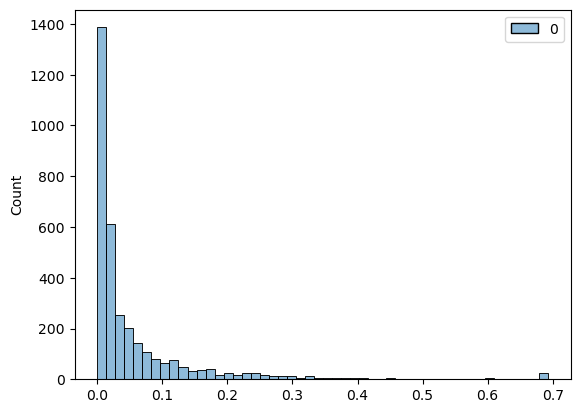

In [82]:
import seaborn as sns
sns.histplot(y, bins=50)
# This clealy shows that the value is not normally distributed, should use log transformations

In [83]:
model.eval()
with torch.no_grad():
    y_val_pred_log = model(X_val_tensor).numpy()
    y_val_pred_original = np.expm1(y_val_pred_log)  # this reverses the log1p
    y_val_true_original = np.expm1(y_val)            # original true values

In [84]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae = mean_absolute_error(y_val_true_original, y_val_pred_original)
mape = mean_absolute_percentage_error(y_val_true_original, y_val_pred_original)

print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2%}")

MAE: 0.0583
MAPE: 549279999624451.38%


In [85]:
# now save the deep learning model
torch.save(model.state_dict(), 'export_China_dependency_model.pt')

In [86]:
# to load this model later
model.load_state_dict(torch.load('export_China_dependency_model.pt'))
model.eval()

ExportDependencyModel(
  (network): Sequential(
    (0): Linear(in_features=12, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)

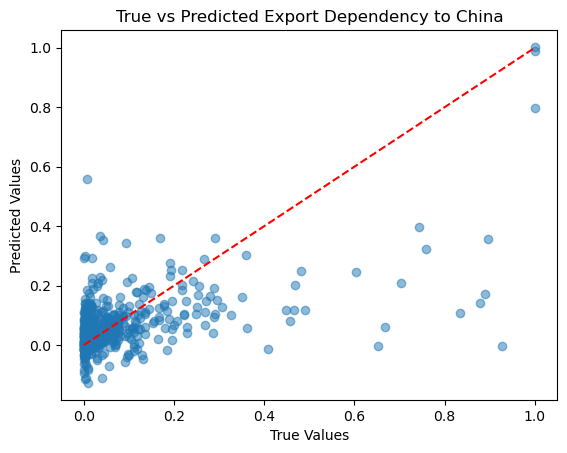

In [88]:
import matplotlib.pyplot as plt

plt.scatter(y_val_true_original, y_val_pred_original, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')  # Ideal line
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Export Dependency to China")
plt.show()

In [95]:
print(df_no_na.index)

Index([   0,    1,    2,    5,    6,    7,    8,    9,   10,   11,
       ...
       3857, 3858, 3859, 3860, 3861, 3862, 3863, 3864, 3865, 3866],
      dtype='int64', length=3339)


In [ ]:
# Now use the same model to predict the values of the is.na dataset. 


In [ ]:
#############################################################################################

In [5]:
############################################################################################
# This part below is try to cluster the countries into three groups
# This part is just to use the df_no_na dataset 

In [6]:
features = ['year', 'agree_China', 'agree_USA',
       'Military_Imports_USA', 'Military_Imports_China', 'US_military_aid',
       'v2x_libdem', 'v2x_polyarchy', 'military_drills_China',
       'export_China_dependency', 'export_USA_dependency',
       'import_China_dependency', 'import_USA_dependency',
       'IdealPointsDistance_USA', 'IdealPointsDistance_China',
       'GDP_per_capita']

In [7]:
# First normalize the data
from sklearn.preprocessing import StandardScaler

X = df_no_na[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42)
df_no_na['Cluster'] = kmeans.fit_predict(X_scaled)

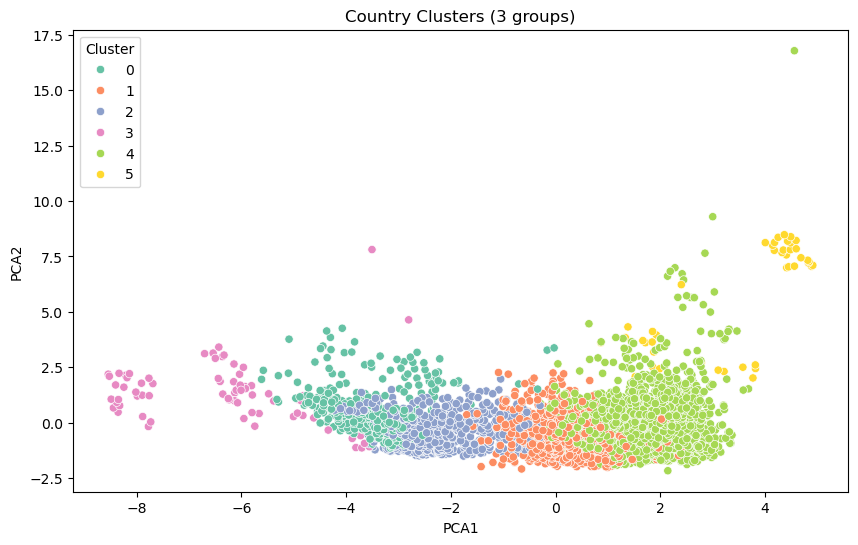

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_no_na['PCA1'], df_no_na['PCA2'] = X_pca[:, 0], X_pca[:, 1]

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_no_na, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Country Clusters (3 groups)')
plt.show()

In [10]:
result = df_no_na[['country_clean', 'Cluster']].drop_duplicates().sort_values('Cluster')

In [11]:
df_no_na.groupby('Cluster')['country_clean'].unique()

Cluster
0    [United Kingdom, Finland, South Korea, Japan, ...
1    [Jamaica, Trinidad and Tobago, Mexico, Guatema...
2    [Ireland, Netherlands, Belgium, Luxembourg, Fr...
3             [United States, Canada, Israel, Ukraine]
4    [Cuba, Paraguay, Russia, Ukraine, Belarus, Arm...
5               [China, Sudan, Mongolia, Sierra Leone]
Name: country_clean, dtype: object

In [12]:
grouped_countries = df_no_na.groupby('Cluster')['country_clean'].unique().to_dict()

# Display each cluster's countries clearly
for cluster, countries in grouped_countries.items():
    print(f"\nCluster {cluster}:")
    for country in countries:
        print(f" - {country}")


Cluster 0:
 - United Kingdom
 - Finland
 - South Korea
 - Japan
 - Luxembourg
 - Switzerland
 - Italy
 - Greece
 - Norway
 - Ireland
 - Denmark
 - Iceland
 - Australia
 - Netherlands
 - Sweden
 - Belgium
 - France
 - Germany
 - Poland
 - Austria
 - New Zealand
 - Spain
 - Estonia
 - Kuwait
 - Qatar
 - Singapore
 - Slovenia
 - Malta

Cluster 1:
 - Jamaica
 - Trinidad and Tobago
 - Mexico
 - Guatemala
 - Honduras
 - El Salvador
 - Nicaragua
 - Costa Rica
 - Panama
 - Colombia
 - Venezuela
 - Guyana
 - Suriname
 - Ecuador
 - Peru
 - Brazil
 - Bolivia
 - Chile
 - Argentina
 - Uruguay
 - Cape Verde
 - Ghana
 - Nigeria
 - Gabon
 - South Africa
 - Botswana
 - Mauritius
 - Mongolia
 - India
 - Bangladesh
 - Sri Lanka
 - Thailand
 - Cambodia
 - Philippines
 - Indonesia
 - Dominican Republic
 - Senegal
 - Lesotho
 - Fiji
 - Madagascar
 - Namibia
 - Greece
 - Sao Tome and Principe
 - Tunisia
 - Niger
 - Sierra Leone
 - Nepal
 - Liberia
 - Armenia

Cluster 2:
 - Ireland
 - Netherlands
 - Belgium


In [ ]:
#################################

In [18]:
#Just run the cluster for the year of 2023
df_2023 = df_no_na[df_no_na['year'] == 2023].copy()

feature_columns = ['agree_China', 'agree_USA', 'Military_Imports_USA', 'Military_Imports_China',
                   'US_military_aid', 'v2x_libdem', 'v2x_polyarchy', 'military_drills_China',
                   'IdealPointsDistance_USA', 'IdealPointsDistance_China', 'GDP_per_capita']
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_2023 = scaler.fit_transform(df_2023[feature_columns])

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)  # or however many clusters you want
df_2023['Cluster'] = kmeans.fit_predict(X_scaled_2023)

print(df_2023[['country_clean', 'Cluster']])  # or whatever your country column is

            country_clean  Cluster
3661        United States        0
3662               Canada        0
3665   Dominican Republic        2
3666              Jamaica        2
3667  Trinidad and Tobago        2
...                   ...      ...
3815            Indonesia        4
3816            Australia        0
3818          New Zealand        0
3821                 Fiji        2
3866                Malta        0

[128 rows x 2 columns]


In [22]:
# Create a dictionary with cluster numbers as keys and list of countries as values
cluster_groups = df_2023.groupby('Cluster')['country_clean'].apply(list).to_dict()

# Print each cluster and its corresponding countries
for cluster_id, countries in cluster_groups.items():
    print(f"\nCluster {cluster_id}:")
    for country in countries:
        print(f" - {country}")


Cluster 0:
 - United States
 - Canada
 - United Kingdom
 - Ireland
 - Netherlands
 - Belgium
 - Luxembourg
 - France
 - Switzerland
 - Spain
 - Portugal
 - Germany
 - Poland
 - Austria
 - Hungary
 - Slovakia
 - Italy
 - Albania
 - Montenegro
 - Croatia
 - Bosnia and Herzegovina
 - Slovenia
 - Greece
 - Cyprus
 - Bulgaria
 - Moldova
 - Romania
 - Estonia
 - Latvia
 - Lithuania
 - Ukraine
 - Georgia
 - Finland
 - Sweden
 - Norway
 - Denmark
 - Iceland
 - Liberia
 - Israel
 - South Korea
 - Japan
 - Australia
 - New Zealand
 - Malta

Cluster 1:
 - El Salvador
 - Nicaragua
 - Azerbaijan
 - Mauritania
 - Burkina Faso
 - Gabon
 - Central African Republic
 - Central African Republic
 - DR Congo
 - Uganda
 - Djibouti
 - Ethiopia
 - Angola
 - Mozambique
 - Zimbabwe
 - Morocco
 - Turkey
 - Egypt
 - Lebanon
 - Jordan
 - Saudi Arabia
 - Kuwait
 - Bahrain
 - Qatar
 - United Arab Emirates
 - Oman
 - Tajikistan
 - Kyrgyzstan
 - Uzbekistan
 - Kazakhstan
 - China
 - Thailand
 - Cambodia
 - Laos
 - Vie